In [3]:
import dask.dataframe as dd
import numpy as np
import os
import pandas as pd

#### Thay đổi hiển thị ####
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
#### Change display ####

input_file = ["/mnt/c/Users/hoang/FileCSV_DACN_2025/scaled_medbiot.csv", "C:\\Users\\hoang\\FileCSV_DACN_2025\\scaled_medbiot.csv"]

if os.name == 'nt':
    input_file = input_file[1]
else:
    input_file = input_file[0]

# df = dd.read_parquet(input_file)
df = dd.read_csv(input_file)
print(df.dtypes)
print(df.npartitions)

MI_dir_5_weight                     float64
MI_dir_5_mean                       float64
MI_dir_5_std                        float64
MI_dir_3_weight                     float64
MI_dir_3_mean                       float64
MI_dir_3_std                        float64
MI_dir_1_weight                     float64
MI_dir_1_mean                       float64
MI_dir_1_std                        float64
MI_dir_0.1_weight                   float64
MI_dir_0.1_mean                     float64
MI_dir_0.1_std                      float64
MI_dir_0.01_weight                  float64
MI_dir_0.01_mean                    float64
MI_dir_0.01_std                     float64
HH_5_weight_0                       float64
HH_5_mean_0                         float64
HH_5_std_0                          float64
HH_5_radius_0_1                     float64
HH_5_magnitude_0_1                  float64
HH_5_covariance_0_1                 float64
HH_5_pcc_0_1                        float64
HH_3_weight_0                   

In [4]:
label_counts = df['label'].value_counts().compute()
print((label_counts))

label
bashlite_spread    3284209
mirai_c2            842669
torii               321775
mirai_spread        401110
benign             6569942
bashlite_c2         627477
Name: count, dtype: int64


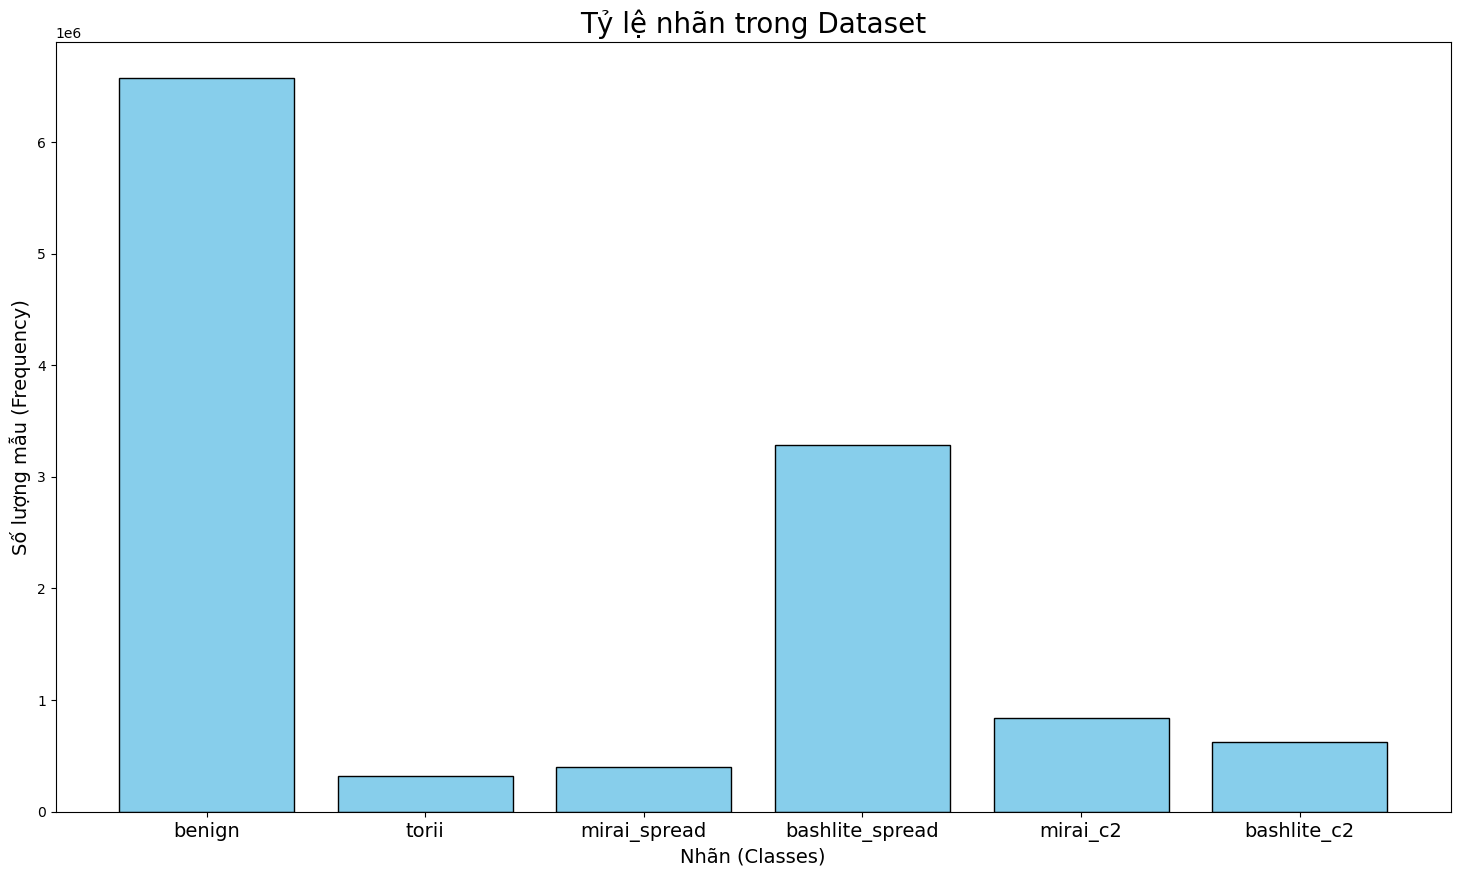

In [5]:

import matplotlib.pyplot as plt
labels =  ['benign', 'torii', 'mirai_spread', 'bashlite_spread', 'mirai_c2', 'bashlite_c2']

ordered_counts = [label_counts.get(label, 0) for label in labels] 

# Vẽ biểu đồ cột
plt.figure(figsize=(18, 10))
plt.bar(labels, ordered_counts, color='skyblue', edgecolor='black')
plt.xlabel("Nhãn (Classes)", fontsize=14)
plt.ylabel("Số lượng mẫu (Frequency)", fontsize=14)
plt.title("Tỷ lệ nhãn trong Dataset", fontsize=20)
plt.xticks(range(len(labels)) ,labels, fontsize= 14) #rotation =45

plt.show()

### Label Mapping

In [6]:
label_map = {'benign': 0, 'torii': 1, 'mirai_spread': 2, 'bashlite_spread': 3, 'mirai_c2': 4, 'bashlite_c2': 5}
df['label'] = df['label'].map(label_map).astype('int32')

/home/hoangvn/miniconda3/miniconda3/envs/doan/lib/python3.9/site-packages/dask_expr/_collection.py:4190: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('label', 'float64'))

  warnings.warn(meta_warning(meta))


In [28]:
print(df.head(100))

       MI_dir_5_weight  MI_dir_5_mean  MI_dir_5_std  MI_dir_3_weight  \
130          -0.058030      -0.453694     -0.099301        -0.033269   
262           1.497369       2.555749     -0.099301         1.619352   
1033         -0.350736      -0.454174     -0.099230        -0.340704   
2092         -0.353435      -0.433096     -0.098990        -0.343834   
3454         -0.355630      -0.466517     -0.099301        -0.345310   
3524         -0.355630      -0.466517     -0.099301        -0.345310   
3720         -0.343215      -0.450370     -0.099185        -0.333326   
4283         -0.353084      -0.466514     -0.099301        -0.343150   
4318         -0.353660      -0.466516     -0.099301        -0.343171   
4549         -0.354695      -0.466117     -0.099291        -0.343344   
4790         -0.285969      -0.433206     -0.098350        -0.281252   
130           0.000000       0.000000      0.000000         0.000000   
262           0.000000       0.000000      0.000000         0.00

# Generator + Train

In [7]:
import numpy as np
import pandas as pd
import dask.dataframe as dk
import tensorflow as tf 
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from datetime import datetime, timedelta
from tensorflow import keras

ratio_test_all = 0.2

from dask_ml.model_selection import train_test_split 
# Bước 1: Tách 80% train, 20% còn lại (val + test)
train_df, val_test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(val_test_df, test_size=0.75, random_state=42)

2025-05-27 16:06:23.200353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748361983.348295   31772 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748361983.386950   31772 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748361983.621254   31772 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748361983.621303   31772 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748361983.621305   31772 computation_placer.cc:177] computation placer alr

In [8]:
################################ BATCH SIZE ########################################
batchSize = 128

features_len = len(df.columns)-1
print("Feature Len: ",features_len)

def dask_to_tf_dataset(dask_df, num_classes): 
    def generator():
        for batch in dask_df.to_delayed():
        # for batch in df.partitions:
            batch=batch.compute()  
            if batch.empty:
                continue

            X = batch.drop(columns='label').values.astype(np.float32)
            y = batch['label'].values.astype(np.int32)
            y_onehot = to_categorical(y, num_classes=num_classes) if num_classes >1 else y

            # for i in range(0, len(X), batchSize):
            #     yield X[i:i+batchSize], y_onehot[i:i+batchSize]
            num_splits = max(1, len(X) // batchSize)  # Đảm bảo không chia nhỏ quá mức
            X_batches = np.array_split(X, num_splits)
            y_batches = np.array_split(y_onehot, num_splits)

            for X_batch, y_batch in zip(X_batches, y_batches):
                yield X_batch, y_batch
            
    output_signature = ( 
        tf.TensorSpec(shape=(None, features_len), dtype=tf.float32), 
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.int32),
    ) if num_classes>1 else ( 
        tf.TensorSpec(shape=(None, features_len), dtype=tf.float32), 
        tf.TensorSpec(shape=(None,), dtype=tf.int32),
    )
    
    return tf.data.Dataset.from_generator(generator, output_signature=output_signature).prefetch(tf.data.AUTOTUNE)

Feature Len:  100


In [9]:
############################ NUM CLASSES#########################
value_count = len(df['label'].value_counts().compute())
num_classes = 1 if  value_count<=2  else value_count

########################### GENERATOR ############################
train_gen = dask_to_tf_dataset(train_df, num_classes).repeat()
val_gen = dask_to_tf_dataset(val_df, num_classes).repeat()
test_gen = dask_to_tf_dataset(test_df, num_classes)

I0000 00:00:1748362012.880960   31772 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2248 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:02:00.0, compute capability: 7.5


In [10]:
import math
n_samples = np.ceil(train_df.shape[0])
steps_per_epoch = int(n_samples / (batchSize))
validation_steps = int(steps_per_epoch / (16))
print("Steps/Epoch: ", steps_per_epoch)

Steps/Epoch:  75306


In [9]:
lr_finder = LRFinder(model)
lr_finder.find(x_train, y_train, start_lr=1e-6, end_lr=1e-2)

NameError: name 'LRFinder' is not defined

In [11]:
########### Enable XLA ###############
tf.config.optimizer.set_jit(True)
    
########### Nếu không dùng XLA ###########
# import os
# os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0"

# shape
features, labels = next(iter(train_gen))
input_shape = (features.shape[1], 1)
output_shape = labels.shape[1] if num_classes > 1 else 1

print(f"Input Shape: {input_shape} \n Output Shape: {output_shape}")

# Định nghĩa mô hình CNN
# VGG, ...
# Conv2D, tabular, ...
# HE, tính tương thích của HE với CNN
# Tính chất data in, out; Học tăng cường
start_time = datetime.now()


loss_func = 'categorical_crossentropy' if num_classes > 1 else 'binary_crossentropy'
activation_func = 'softmax' if num_classes >1 else 'sigmoid'
print(f"Num classe: {num_classes}\nLoss Fucntion: {loss_func}\nActivation Function: {activation_func}")
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"), #, kernel_regularizer=l2(0.01)
    layers.BatchNormalization(),
    layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.1),
    layers.Flatten(), # layers.GlobalAveragePooling1D(), may be tốt hơn
    layers.Dense(64, activation='relu'), #, kernel_regularizer=l2(0.01)
    layers.BatchNormalization(),
    layers.Dense(output_shape, activation= activation_func)
])
adam_optimizer = optimizers.Adam(learning_rate=3e-4, clipnorm=1.2)
model.compile(optimizer=adam_optimizer, loss=loss_func, metrics=['accuracy'])
model.summary()


from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import math

def cosine_annealing(epoch, lr):
    initial_lr = 3e-4
    min_lr = 1e-6
    max_epochs = 40  # Tổng số epoch dự kiến
    cosine_decay = 0.5 * (1 + math.cos(math.pi * epoch / max_epochs))
    new_lr = min_lr + (initial_lr - min_lr) * cosine_decay
    return new_lr
cosine_scheduler = LearningRateScheduler(cosine_annealing, verbose=1)

csv_logger = CSVLogger("Centralized_Log/"+ datetime.now().strftime("Month%mDay%d__%Hh%Mp")+".csv" , append=True)

model_path =  "Centralized_Model/cnn_model_" + datetime.now().strftime("Month%mDay%d__%Hh%Mp")
print("Model Path: ", model_path)

callbacks = [
    cosine_scheduler,
    EarlyStopping(monitor='val_loss', patience=5, verbose =1),
    ModelCheckpoint(model_path+"_best.keras", monitor='val_loss', save_best_only=True, verbose=1),
    csv_logger
]
model.fit(train_gen, epochs=50,
          validation_data=val_gen, 
          validation_steps=validation_steps, 
        steps_per_epoch=steps_per_epoch, verbose = 1, callbacks=callbacks)

end_time = datetime.now()
simulated_time = end_time - start_time

# Lưu mô hình
model.save(model_path+".keras")

print(f"Simulated time: {simulated_time}")

Input Shape: (100, 1) 
 Output Shape: 6
Num classe: 6
Loss Fucntion: categorical_crossentropy
Activation Function: softmax


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 100, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 100, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,838 (878.27 KB)

 Trainable params: 224,390 (876.52 KB)

 Non-trainable params: 448 (1.75 KB)

Model Path:  Centralized_Model/cnn_model_Month05Day27__16h08p

Epoch 1: LearningRateScheduler setting learning rate to 0.0003.
Epoch 1/50


I0000 00:00:1748362088.154620   33978 service.cc:152] XLA service 0x7f9a64003e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748362088.154839   33978 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 with Max-Q Design, Compute Capability 7.5
I0000 00:00:1748362088.211335   33978 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1748362088.475422   33978 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-05-27 16:08:10.504603: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


69723/75306 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.3934 - loss: 1.4235

KeyboardInterrupt: 

# Pre, Re, F1

Precision:  0.9997366418914965
Recall:  0.9999414639857173
F1-Score:  0.999839042448896


2025-05-27 07:59:55.997550: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


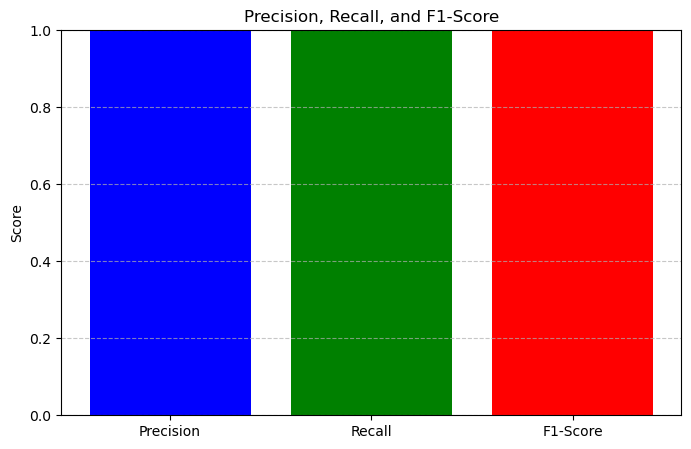

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

model_path = "Centralized_Model/cnn_model_Month05Day27__02h42p_best.keras"
model = load_model(model_path)
#model = load_model("saved_model/cnn_model_2-0_batch512_20h37p__06-05-2025.keras")
# Tính số hàng thật sự trong test_df
num_batches_test = 100
y_true_all = []
y_pred_all = []

for X_batch, y_batch in test_gen.take(num_batches_test):
    y_true_all.extend(y_batch.numpy().flatten())

    y_pred_prob = model.predict(X_batch, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    y_pred_all.extend(y_pred)

# Tính metric
precision = precision_score(y_true_all, y_pred_all, average='binary')
recall = recall_score(y_true_all, y_pred_all, average='binary')
f1 = f1_score(y_true_all, y_pred_all, average='binary')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

param_names = ['Precision', 'Recall', 'F1-Score']
array = [precision, recall, f1]

x = np.arange(len(param_names))
width = 0.2  # Độ rộng của mỗi cột
plt.figure(figsize=(8, 5))
plt.bar(param_names, array, color=['blue', 'green', 'red'])

# Cấu hình trục và nhãn
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score")
plt.ylim(0, 1)  # Giá trị từ 0 đến 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()


# Confusion matrix

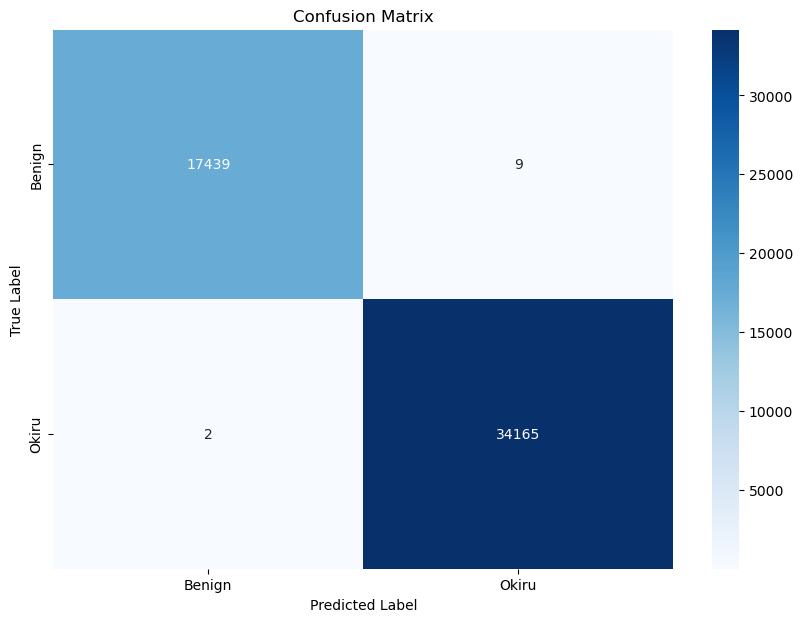

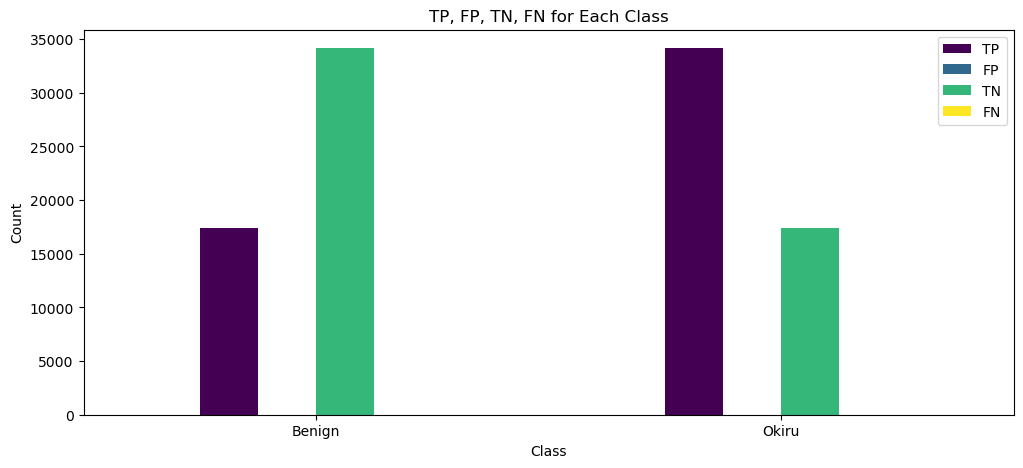

In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_true_all, y_pred_all)

attack_types =['Benign', 'Okiru']
# Vẽ heatmap
plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(cm.shape[0]), yticklabels=range(cm.shape[0))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=attack_types, yticklabels=attack_types)

# Thêm nhãn
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Hiển thị
plt.show()


metrics = []
num_classes = len(attack_types)

# Duyệt từng lớp để tính TP, FP, TN, FN
for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    metrics.append([attack_types[i], TP, FP, TN, FN])

# Chuyển thành DataFrame
df_metrics = pd.DataFrame(metrics, columns=["Attack_Types", "TP", "FP", "TN", "FN"])
# Vẽ biểu đồ
df_metrics.set_index("Attack_Types").plot(kind="bar", figsize=(12, 5), colormap="viridis")

# Thêm nhãn
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("TP, FP, TN, FN for Each Class")
plt.xticks(rotation=0)
plt.legend(["TP", "FP", "TN", "FN"])

# Hiển thị
plt.show()

# Acc, Loss Graph

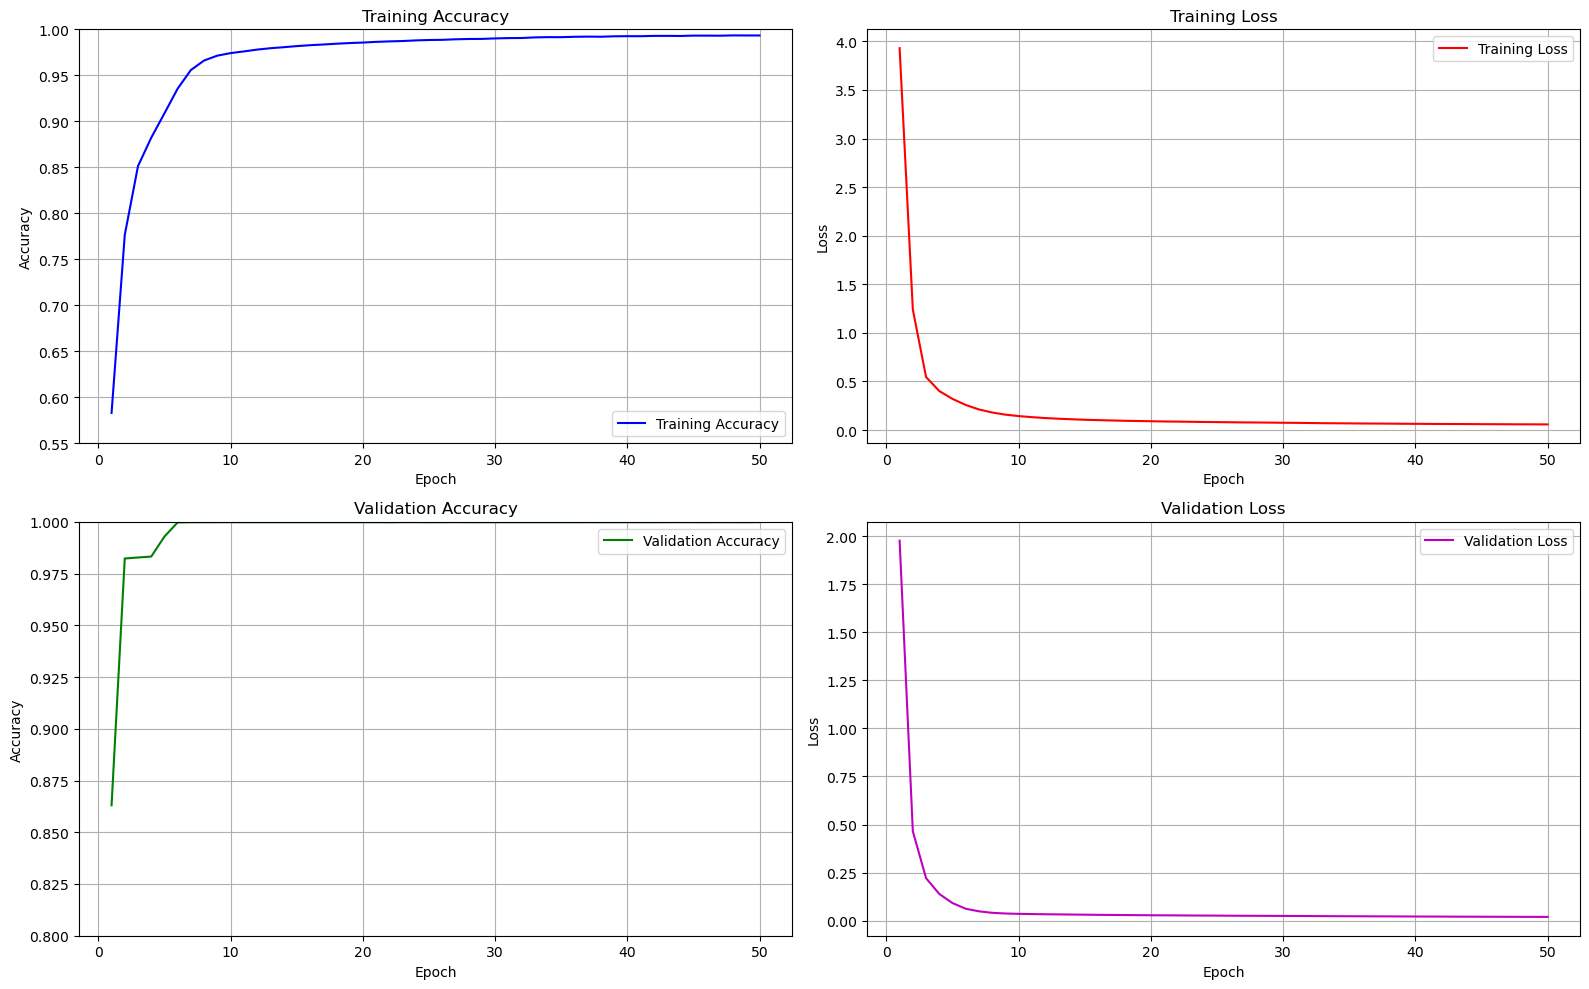

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc log từ file CSV
log_name = "/mnt/c/Users/hoang/D/Code/CoCheMalware/Centralized_Log/Month05Day27__02h42p.csv"
log_df = pd.read_csv(log_name)  # Đổi tên file nếu cần

epochs = range(1, 51)#len(log_df) + 1

plt.figure(figsize=(16, 10))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs, log_df['accuracy'], 'b-', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.ylim(0.55, 1.0)

# Loss
plt.subplot(2, 2, 2)
plt.plot(epochs, log_df['loss'], 'r-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Validation Accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, log_df['val_accuracy'], 'g-', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.ylim(0.8, 1.0)

# Validation Loss
plt.subplot(2, 2, 4)
plt.plot(epochs, log_df['val_loss'], 'm-', label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()